In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#### Prepare for Dataset

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


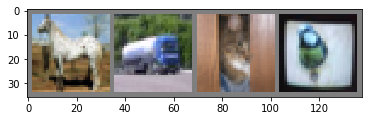

horse truck   cat  bird


In [3]:
# The function to show an image.
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize.
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images.
dataiter = iter(trainloader)
images, labels = dataiter.next()
# Show images.
imshow(torchvision.utils.make_grid(images))
# Print labels.
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

#### Choose a Device

In [4]:
# If there are GPUs, choose the first one for computing. Otherwise use CPU.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)  
# If 'cuda:0' is printed, it means GPU is available.

cpu


#### Network Definition

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        ###### Fill the blank here ######
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
        
        
        
        
    def forward(self, x):
        ###### Fill the blank here ######
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x        

net = Net()     # Create the network instance.
net.to(device)  # Move the network parameters to the specified device.

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

#### Optimizer and Loss Function

In [6]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) 

#### Training Procedure

In [8]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        print(i, data)
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

0 [tensor([[[[-0.6549, -0.5216, -0.4196,  ..., -0.0431, -0.1608, -0.3176],
          [-0.6000, -0.4667, -0.3569,  ...,  0.0902, -0.0431, -0.2235],
          [-0.5608, -0.4353, -0.3020,  ...,  0.0980, -0.0588, -0.2471],
          ...,
          [-0.8196, -0.6863, -0.4510,  ..., -0.7647, -0.7569, -0.7412],
          [-0.7490, -0.6549, -0.5216,  ..., -0.7725, -0.7490, -0.7804],
          [-0.7804, -0.6863, -0.5529,  ..., -0.7961, -0.8039, -0.8275]],

         [[-0.3804, -0.2471, -0.1294,  ...,  0.1294,  0.0196, -0.1216],
          [-0.3020, -0.1843, -0.0745,  ...,  0.2471,  0.1373,  0.0118],
          [-0.2549, -0.1608, -0.0588,  ...,  0.2549,  0.1216,  0.0039],
          ...,
          [-0.7490, -0.6000, -0.3569,  ..., -0.5843, -0.6392, -0.6392],
          [-0.7255, -0.5529, -0.3569,  ..., -0.6000, -0.6471, -0.7020],
          [-0.6392, -0.5451, -0.4118,  ..., -0.6000, -0.6863, -0.7725]],

         [[-0.4275, -0.3020, -0.1843,  ...,  0.2549,  0.1608, -0.0196],
          [-0.3647, -0.2471

9 [tensor([[[[-0.6784, -0.5922, -0.3961,  ..., -0.1451,  0.1059,  0.2627],
          [-0.5451, -0.4980, -0.3882,  ..., -0.4745, -0.1765,  0.1294],
          [-0.2471, -0.2941, -0.2627,  ..., -0.7020, -0.5294, -0.2784],
          ...,
          [ 0.3725,  0.2471,  0.1765,  ..., -0.2941, -0.4510, -0.5843],
          [ 0.4275,  0.3569,  0.2314,  ..., -0.3098, -0.4588, -0.5137],
          [ 0.4510,  0.4902,  0.3647,  ..., -0.2314, -0.4824, -0.4745]],

         [[-0.4353, -0.3412, -0.1765,  ...,  0.0588,  0.2784,  0.4118],
          [-0.2706, -0.2078, -0.1216,  ..., -0.1843,  0.0667,  0.2941],
          [-0.0275, -0.0353, -0.0039,  ..., -0.4039, -0.2784, -0.0667],
          ...,
          [ 0.3333,  0.2000,  0.1137,  ..., -0.2706, -0.3647, -0.4353],
          [ 0.4039,  0.3176,  0.1686,  ..., -0.2941, -0.3804, -0.4039],
          [ 0.4431,  0.4745,  0.3333,  ..., -0.2078, -0.4196, -0.3882]],

         [[-0.8745, -0.8431, -0.7412,  ..., -0.7098, -0.5765, -0.4745],
          [-0.8510, -0.8353

12 [tensor([[[[-0.3020, -0.3882, -0.3961,  ..., -0.4196, -0.4275, -0.4824],
          [-0.2157, -0.1922, -0.2471,  ..., -0.4588, -0.4510, -0.5059],
          [-0.1765, -0.1765, -0.2078,  ..., -0.3490, -0.3569, -0.3725],
          ...,
          [ 0.3255,  0.5137,  0.4275,  ...,  0.6157,  0.6471,  0.6627],
          [ 0.5059,  0.7098,  0.7490,  ...,  0.6157,  0.6549,  0.6706],
          [ 0.1216,  0.1765,  0.2471,  ...,  0.1922,  0.2314,  0.2549]],

         [[-0.1216, -0.1922, -0.2000,  ..., -0.2471, -0.2392, -0.2784],
          [-0.1137, -0.1451, -0.2157,  ..., -0.3647, -0.3412, -0.3647],
          [-0.1216, -0.1922, -0.2235,  ..., -0.2314, -0.1922, -0.1529],
          ...,
          [ 0.3490,  0.4353,  0.3961,  ...,  0.4353,  0.4667,  0.5137],
          [ 0.4588,  0.5686,  0.6235,  ...,  0.4039,  0.4745,  0.5059],
          [ 0.1529,  0.1765,  0.2549,  ...,  0.1608,  0.2314,  0.2392]],

         [[-0.1137, -0.2000, -0.1686,  ..., -0.2392, -0.2706, -0.2863],
          [-0.1137, -0.152

21 [tensor([[[[ 0.7725,  0.8667,  0.9686,  ...,  0.9765,  0.9686,  0.9765],
          [ 0.0353,  0.2000,  0.4431,  ...,  0.9294,  0.9294,  0.9294],
          [ 0.1137,  0.0980,  0.0824,  ...,  1.0000,  1.0000,  1.0000],
          ...,
          [ 0.8588,  0.9294,  0.8667,  ...,  0.8980,  0.8588,  0.8196],
          [ 1.0000,  0.9922,  1.0000,  ...,  0.9843,  0.9922,  1.0000],
          [ 1.0000,  0.9922,  0.9922,  ...,  0.9922,  0.9922,  0.9843]],

         [[ 0.8118,  0.8902,  0.9686,  ...,  0.9765,  0.9686,  0.9765],
          [ 0.0980,  0.2471,  0.4824,  ...,  0.9294,  0.9294,  0.9294],
          [ 0.2078,  0.1843,  0.1451,  ...,  1.0000,  1.0000,  1.0000],
          ...,
          [ 0.8588,  0.9294,  0.8667,  ...,  0.8980,  0.8588,  0.8196],
          [ 1.0000,  0.9922,  1.0000,  ...,  0.9843,  0.9922,  1.0000],
          [ 1.0000,  0.9922,  0.9922,  ...,  0.9922,  0.9922,  0.9843]],

         [[ 0.7961,  0.8824,  0.9686,  ...,  0.9765,  0.9686,  0.9765],
          [ 0.1216,  0.262

33 [tensor([[[[ 0.2941,  0.3020,  0.3098,  ..., -0.6314, -0.6392, -0.5373],
          [ 0.3176,  0.3020,  0.3490,  ..., -0.6863, -0.7098, -0.7569],
          [ 0.3020,  0.2471,  0.3333,  ..., -0.6627, -0.7412, -0.7804],
          ...,
          [-0.7647, -0.7176, -0.6549,  ..., -0.4431, -0.4039, -0.2314],
          [-0.7020, -0.7490, -0.6941,  ..., -0.4745, -0.4275, -0.2078],
          [-0.6627, -0.7020, -0.6941,  ..., -0.5529, -0.3647, -0.3255]],

         [[ 0.4745,  0.4824,  0.4824,  ..., -0.4196, -0.4275, -0.3333],
          [ 0.4980,  0.4824,  0.5294,  ..., -0.4902, -0.5059, -0.5686],
          [ 0.4510,  0.3961,  0.4824,  ..., -0.4745, -0.5451, -0.5922],
          ...,
          [-0.5922, -0.6235, -0.5922,  ..., -0.2235, -0.1451,  0.0588],
          [-0.5451, -0.6549, -0.6314,  ..., -0.2627, -0.1765,  0.0745],
          [-0.5373, -0.6078, -0.6235,  ..., -0.3412, -0.1294, -0.0510]],

         [[-0.0902, -0.0824, -0.0745,  ..., -0.5451, -0.5608, -0.5216],
          [-0.1294, -0.145

37 [tensor([[[[-0.6627, -0.7176, -0.7647,  ..., -0.7961, -0.7804, -0.7804],
          [-0.6706, -0.6627, -0.6863,  ..., -0.7725, -0.7882, -0.7804],
          [-0.6392, -0.5922, -0.6549,  ..., -0.7333, -0.7569, -0.7569],
          ...,
          [ 0.1686,  0.1059,  0.1294,  ...,  0.2784,  0.3804,  0.1843],
          [ 0.0667,  0.0745,  0.1059,  ...,  0.3020,  0.1765,  0.0588],
          [ 0.0510,  0.1294,  0.0902,  ...,  0.0902, -0.0588, -0.0510]],

         [[-0.7098, -0.7725, -0.8118,  ..., -0.8039, -0.7882, -0.7882],
          [-0.7176, -0.7098, -0.7333,  ..., -0.7804, -0.7961, -0.7882],
          [-0.6863, -0.6392, -0.7020,  ..., -0.7412, -0.7647, -0.7647],
          ...,
          [ 0.1686,  0.1137,  0.1373,  ...,  0.2549,  0.3569,  0.1608],
          [ 0.1059,  0.1137,  0.1451,  ...,  0.2863,  0.1608,  0.0353],
          [ 0.0745,  0.1451,  0.1137,  ...,  0.0902, -0.0745, -0.0667]],

         [[-0.6784, -0.7412, -0.7804,  ..., -0.8275, -0.8039, -0.8039],
          [-0.7020, -0.694

48 [tensor([[[[ 0.1216,  0.1373,  0.0980,  ..., -0.3804, -0.3882, -0.3882],
          [-0.1059, -0.0353,  0.0196,  ..., -0.0118, -0.0196,  0.0196],
          [ 0.0980,  0.2157,  0.2549,  ...,  0.1686,  0.2000,  0.2863],
          ...,
          [ 0.1686,  0.2627,  0.3882,  ...,  0.1843,  0.2235,  0.2314],
          [ 0.2392,  0.3098,  0.3412,  ...,  0.2157,  0.2157,  0.3020],
          [ 0.2549,  0.2549,  0.2784,  ...,  0.2314,  0.2157,  0.2706]],

         [[ 0.1216,  0.1451,  0.1059,  ..., -0.3725, -0.3412, -0.3412],
          [-0.1059, -0.0275,  0.0275,  ...,  0.0275,  0.0431,  0.0902],
          [ 0.1059,  0.2235,  0.2627,  ...,  0.2314,  0.2549,  0.3412],
          ...,
          [ 0.1137,  0.2078,  0.3333,  ...,  0.1451,  0.1765,  0.1843],
          [ 0.1843,  0.2549,  0.2863,  ...,  0.1765,  0.1765,  0.2549],
          [ 0.2078,  0.2000,  0.2235,  ...,  0.1686,  0.1608,  0.2157]],

         [[-0.2863, -0.2863, -0.3412,  ..., -0.6078, -0.6078, -0.6157],
          [-0.5373, -0.482

58 [tensor([[[[ 0.5216,  0.4980,  0.5059,  ...,  0.4431,  0.2784,  0.5686],
          [ 0.5373,  0.5137,  0.5216,  ..., -0.1686, -0.0196,  0.6078],
          [ 0.5765,  0.5529,  0.5529,  ..., -0.6706,  0.2157,  0.6392],
          ...,
          [ 0.3176,  0.6706,  0.5216,  ...,  0.5137,  0.5059,  0.5294],
          [ 0.3176,  0.5059,  0.6471,  ...,  0.4902,  0.4980,  0.4667],
          [ 0.4588,  0.4824,  0.6941,  ...,  0.2000,  0.2235,  0.1922]],

         [[ 0.6863,  0.6549,  0.6706,  ...,  0.5373,  0.3961,  0.7020],
          [ 0.6706,  0.6471,  0.6549,  ..., -0.2078, -0.0196,  0.6941],
          [ 0.6784,  0.6471,  0.6549,  ..., -0.8118,  0.1216,  0.6549],
          ...,
          [ 0.2235,  0.5843,  0.4431,  ...,  0.3098,  0.2863,  0.3098],
          [ 0.2314,  0.4118,  0.5451,  ...,  0.3176,  0.3176,  0.2863],
          [ 0.3725,  0.3882,  0.5922,  ...,  0.0431,  0.0588, -0.0196]],

         [[ 0.7961,  0.7647,  0.7725,  ...,  0.6314,  0.4902,  0.8196],
          [ 0.7725,  0.749

67 [tensor([[[[-0.5294, -0.5373, -0.5294,  ..., -0.4353, -0.4824, -0.3569],
          [-0.5137, -0.5373, -0.5529,  ..., -0.4431, -0.4824, -0.3020],
          [-0.4745, -0.5373, -0.5373,  ..., -0.4588, -0.5137, -0.3176],
          ...,
          [-0.5294, -0.6000, -0.5922,  ..., -0.5922, -0.6314, -0.3882],
          [-0.5686, -0.6157, -0.5922,  ..., -0.6000, -0.6314, -0.3725],
          [-0.4510, -0.4667, -0.4510,  ..., -0.4667, -0.5059, -0.3098]],

         [[-0.2235, -0.1922, -0.2000,  ..., -0.1373, -0.1686, -0.0667],
          [-0.1059, -0.0353, -0.0510,  ...,  0.0667,  0.0353,  0.1373],
          [-0.0980, -0.0196, -0.0431,  ...,  0.0902,  0.0588,  0.1451],
          ...,
          [-0.4039, -0.3961, -0.3882,  ..., -0.4745, -0.4902, -0.2863],
          [-0.4196, -0.4196, -0.3961,  ..., -0.4980, -0.5216, -0.2941],
          [-0.3255, -0.3098, -0.3176,  ..., -0.3961, -0.4353, -0.2549]],

         [[-0.1608, -0.0902, -0.1059,  ...,  0.0275, -0.0039,  0.0353],
          [-0.0275,  0.113

75 [tensor([[[[-0.5137, -0.5059, -0.4980,  ..., -0.0824, -0.0588, -0.0588],
          [-0.4118, -0.3176, -0.3412,  ..., -0.1216, -0.0588, -0.1216],
          [-0.2941, -0.1686, -0.1843,  ..., -0.2000, -0.2471, -0.2471],
          ...,
          [-0.3020, -0.2941, -0.2627,  ..., -0.2863, -0.3490, -0.2627],
          [-0.2784, -0.3176, -0.2784,  ..., -0.3882, -0.4039, -0.2706],
          [-0.2784, -0.3647, -0.3490,  ..., -0.4667, -0.4745, -0.3647]],

         [[-0.3569, -0.3647, -0.3569,  ...,  0.0667,  0.0902,  0.0902],
          [-0.2627, -0.1922, -0.2235,  ...,  0.0196,  0.0745,  0.0196],
          [-0.1686, -0.0902, -0.1216,  ..., -0.0275, -0.0745, -0.0902],
          ...,
          [-0.1059, -0.0588, -0.0196,  ..., -0.0039, -0.0902, -0.0353],
          [-0.0745, -0.0902, -0.0431,  ..., -0.1294, -0.1451, -0.0431],
          [-0.0588, -0.1529, -0.1059,  ..., -0.2314, -0.2392, -0.1294]],

         [[-0.6471, -0.6549, -0.6549,  ..., -0.3961, -0.3412, -0.3176],
          [-0.5843, -0.537

83 [tensor([[[[ 0.5373,  0.4980,  0.5608,  ...,  0.7412,  0.7255,  0.7176],
          [ 0.3725,  0.2863,  0.3569,  ...,  0.6157,  0.6000,  0.5765],
          [ 0.3882,  0.3255,  0.3725,  ...,  0.6314,  0.6157,  0.5922],
          ...,
          [ 0.4510,  0.3804,  0.4039,  ...,  0.3569,  0.4118,  0.5137],
          [ 0.4667,  0.3961,  0.4353,  ...,  0.4275,  0.4588,  0.5294],
          [ 0.5373,  0.4824,  0.5059,  ...,  0.5137,  0.5373,  0.5765]],

         [[ 0.4353,  0.4118,  0.4745,  ...,  0.7412,  0.7255,  0.7176],
          [ 0.2392,  0.1686,  0.2549,  ...,  0.6157,  0.6000,  0.5765],
          [ 0.2706,  0.1922,  0.2627,  ...,  0.6314,  0.6157,  0.5922],
          ...,
          [ 0.4431,  0.3412,  0.3647,  ...,  0.3176,  0.3804,  0.4588],
          [ 0.4510,  0.3490,  0.3804,  ...,  0.3882,  0.4118,  0.4667],
          [ 0.5216,  0.4588,  0.4824,  ...,  0.4745,  0.4902,  0.5294]],

         [[ 0.3098,  0.3098,  0.3961,  ...,  0.7412,  0.7255,  0.7176],
          [ 0.0902,  0.035

92 [tensor([[[[-0.0980, -0.6314, -0.6863,  ..., -0.3569, -0.3176, -0.2392],
          [-0.4039, -0.6000, -0.6863,  ..., -0.3804, -0.4039, -0.3647],
          [-0.6235, -0.6784, -0.6235,  ..., -0.3412, -0.3176, -0.3569],
          ...,
          [ 0.5529,  0.5373,  0.5843,  ...,  0.4667,  0.5059,  0.5451],
          [ 0.5608,  0.5608,  0.5686,  ...,  0.7020,  0.7020,  0.6863],
          [ 0.6627,  0.6706,  0.6627,  ...,  0.6784,  0.6706,  0.6784]],

         [[ 0.0118, -0.4275, -0.4196,  ...,  0.0039,  0.0431,  0.1216],
          [-0.2471, -0.3961, -0.4510,  ..., -0.0275, -0.0510, -0.0196],
          [-0.4196, -0.4745, -0.4118,  ...,  0.0118,  0.0275, -0.0118],
          ...,
          [ 0.7098,  0.6784,  0.7020,  ...,  0.5451,  0.5922,  0.6471],
          [ 0.6784,  0.6627,  0.6706,  ...,  0.7490,  0.7490,  0.7569],
          [ 0.6941,  0.7098,  0.7176,  ...,  0.7569,  0.7569,  0.7804]],

         [[ 0.0902, -0.3569, -0.3490,  ..., -0.1765, -0.1373, -0.0431],
          [-0.1686, -0.325

100 [tensor([[[[ 0.2078,  0.2000,  0.2000,  ...,  0.1373,  0.1373,  0.1373],
          [ 0.2000,  0.1922,  0.1922,  ...,  0.1373,  0.1373,  0.1373],
          [ 0.2157,  0.2000,  0.2000,  ...,  0.1451,  0.1451,  0.1451],
          ...,
          [ 0.0118,  0.0510,  0.1451,  ..., -0.6000, -0.5451, -0.5059],
          [ 0.0039,  0.0510,  0.0980,  ..., -0.3176, -0.4118, -0.5765],
          [ 0.0039,  0.0353,  0.0353,  ..., -0.4431, -0.5843, -0.6471]],

         [[ 0.2314,  0.2235,  0.2235,  ...,  0.1608,  0.1608,  0.1608],
          [ 0.2235,  0.2157,  0.2157,  ...,  0.1608,  0.1608,  0.1608],
          [ 0.2392,  0.2235,  0.2235,  ...,  0.1686,  0.1686,  0.1686],
          ...,
          [ 0.0510,  0.0431,  0.0667,  ..., -0.6471, -0.5922, -0.5529],
          [ 0.0431,  0.0353,  0.0275,  ..., -0.3647, -0.4588, -0.6235],
          [ 0.0353,  0.0196, -0.0353,  ..., -0.4902, -0.6314, -0.6941]],

         [[ 0.3020,  0.2863,  0.2941,  ...,  0.2157,  0.2157,  0.2157],
          [ 0.2941,  0.28

110 [tensor([[[[ 0.4275,  0.4039,  0.3882,  ...,  0.4824,  0.4510,  0.4510],
          [ 0.4588,  0.4431,  0.4275,  ...,  0.5137,  0.4824,  0.4824],
          [ 0.4667,  0.4588,  0.4588,  ...,  0.5294,  0.4980,  0.5059],
          ...,
          [ 0.6863,  0.6941,  0.7255,  ...,  0.7098,  0.7098,  0.7098],
          [ 0.6784,  0.6784,  0.6941,  ...,  0.7333,  0.7255,  0.7176],
          [ 0.6706,  0.6392,  0.6627,  ...,  0.7569,  0.7412,  0.7490]],

         [[ 0.3020,  0.2863,  0.2784,  ...,  0.3333,  0.3176,  0.3176],
          [ 0.3412,  0.3255,  0.3098,  ...,  0.3569,  0.3333,  0.3490],
          [ 0.3490,  0.3412,  0.3333,  ...,  0.3490,  0.3412,  0.3569],
          ...,
          [ 0.5922,  0.6157,  0.6549,  ...,  0.6706,  0.6706,  0.6706],
          [ 0.5922,  0.6078,  0.6392,  ...,  0.7176,  0.7098,  0.7020],
          [ 0.5765,  0.5843,  0.6157,  ...,  0.7647,  0.7490,  0.7333]],

         [[ 0.1373,  0.1137,  0.0980,  ...,  0.2627,  0.2392,  0.2392],
          [ 0.1686,  0.16

117 [tensor([[[[-0.1686, -0.1686, -0.1529,  ..., -0.6863, -0.7333, -0.7647],
          [-0.0745, -0.0824, -0.0431,  ..., -0.7176, -0.7490, -0.7569],
          [ 0.0588,  0.0431,  0.0353,  ..., -0.7098, -0.7490, -0.7569],
          ...,
          [ 0.5922,  0.6392,  0.6941,  ...,  0.8902,  0.8824,  0.8667],
          [ 0.6157,  0.6706,  0.7255,  ...,  0.8196,  0.8275,  0.7882],
          [ 0.7020,  0.7098,  0.7569,  ...,  0.8196,  0.7961,  0.7647]],

         [[-0.2784, -0.2863, -0.2784,  ..., -0.8431, -0.8667, -0.8745],
          [-0.2000, -0.2157, -0.1843,  ..., -0.8353, -0.8667, -0.8745],
          [-0.0902, -0.1137, -0.1216,  ..., -0.8353, -0.8667, -0.8667],
          ...,
          [ 0.4824,  0.5451,  0.6157,  ...,  0.9059,  0.8824,  0.8588],
          [ 0.5059,  0.5765,  0.6471,  ...,  0.8275,  0.8039,  0.7569],
          [ 0.5922,  0.6235,  0.6784,  ...,  0.8196,  0.7725,  0.7176]],

         [[-0.4039, -0.4353, -0.4510,  ..., -0.8667, -0.9059, -0.9216],
          [-0.3255, -0.36

127 [tensor([[[[-0.5922, -0.5451, -0.4824,  ..., -0.4118, -0.4745, -0.5216],
          [-0.5922, -0.5529, -0.5059,  ..., -0.1059, -0.1216, -0.1294],
          [-0.5529, -0.4824, -0.5216,  ..., -0.3333, -0.3804, -0.3255],
          ...,
          [ 0.4980,  0.4118,  0.2392,  ..., -0.5765, -0.4510, -0.1765],
          [ 0.4275,  0.4980,  0.3961,  ..., -0.2784, -0.0510,  0.0902],
          [ 0.3176,  0.3882,  0.4667,  ...,  0.0902,  0.1608,  0.1686]],

         [[-0.6549, -0.6157, -0.5922,  ..., -0.4667, -0.5294, -0.5843],
          [-0.6392, -0.5922, -0.5765,  ..., -0.1922, -0.2000, -0.2471],
          [-0.5843, -0.4431, -0.5137,  ..., -0.4196, -0.4510, -0.4275],
          ...,
          [ 0.1608,  0.0431, -0.1529,  ..., -0.7804, -0.6941, -0.4353],
          [ 0.0902,  0.1529,  0.0196,  ..., -0.5373, -0.3255, -0.2078],
          [-0.0353,  0.0431,  0.1137,  ..., -0.2235, -0.1451, -0.1373]],

         [[-0.7490, -0.7255, -0.7176,  ..., -0.5686, -0.6235, -0.6706],
          [-0.7333, -0.70

131 [tensor([[[[-0.1529, -0.1686, -0.1608,  ..., -0.1686, -0.1686, -0.1686],
          [-0.1529, -0.1686, -0.1059,  ..., -0.1686, -0.1608, -0.1686],
          [-0.1451, -0.1686, -0.1137,  ..., -0.1608, -0.1608, -0.1608],
          ...,
          [-0.0745, -0.0902, -0.0824,  ..., -0.0745, -0.0824, -0.0824],
          [-0.0745, -0.0824, -0.0824,  ..., -0.0745, -0.0824, -0.0745],
          [-0.0745, -0.0824, -0.0824,  ..., -0.0745, -0.0745, -0.0745]],

         [[ 0.0745,  0.0588,  0.0667,  ...,  0.0667,  0.0667,  0.0667],
          [ 0.0745,  0.0588,  0.1137,  ...,  0.0745,  0.0745,  0.0745],
          [ 0.0824,  0.0588,  0.1137,  ...,  0.0824,  0.0824,  0.0824],
          ...,
          [ 0.1608,  0.1451,  0.1529,  ...,  0.1608,  0.1529,  0.1529],
          [ 0.1608,  0.1451,  0.1529,  ...,  0.1608,  0.1529,  0.1529],
          [ 0.1608,  0.1529,  0.1529,  ...,  0.1608,  0.1608,  0.1608]],

         [[ 0.3098,  0.2941,  0.2863,  ...,  0.2941,  0.2941,  0.2941],
          [ 0.3098,  0.29

144 [tensor([[[[ 1.0000,  1.0000,  1.0000,  ...,  0.8510,  0.4588,  0.5765],
          [ 1.0000,  0.9922,  1.0000,  ...,  0.7098,  0.3255,  0.6000],
          [ 1.0000,  1.0000,  1.0000,  ...,  0.6078,  0.4902,  0.9686],
          ...,
          [ 1.0000,  0.9922,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  0.9922,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  0.9922,  1.0000,  ...,  1.0000,  1.0000,  1.0000]],

         [[ 1.0000,  1.0000,  1.0000,  ...,  0.7176,  0.2863,  0.4275],
          [ 1.0000,  0.9922,  1.0000,  ...,  0.5373,  0.1608,  0.4902],
          [ 1.0000,  1.0000,  1.0000,  ...,  0.4667,  0.4196,  0.9608],
          ...,
          [ 1.0000,  0.9922,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  0.9922,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  0.9922,  1.0000,  ...,  1.0000,  1.0000,  1.0000]],

         [[ 1.0000,  1.0000,  1.0000,  ...,  0.5216,  0.0275,  0.3176],
          [ 1.0000,  0.99

152 [tensor([[[[-0.2784, -0.3961, -0.4980,  ..., -0.3020, -0.2471, -0.2784],
          [-0.4431, -0.5529, -0.5529,  ..., -0.3098, -0.2549, -0.3255],
          [-0.4824, -0.5529, -0.6078,  ..., -0.3255, -0.1451, -0.2235],
          ...,
          [ 0.0588,  0.0510,  0.0980,  ..., -0.0824, -0.0745, -0.0667],
          [ 0.0902,  0.0980,  0.0980,  ..., -0.0275, -0.0275, -0.0353],
          [-0.1059, -0.0118, -0.1529,  ...,  0.0196,  0.0588,  0.0510]],

         [[-0.2157, -0.3490, -0.4588,  ..., -0.3255, -0.2392, -0.2706],
          [-0.3725, -0.5059, -0.5451,  ..., -0.3412, -0.2471, -0.2941],
          [-0.4039, -0.4745, -0.5765,  ..., -0.3490, -0.2392, -0.3176],
          ...,
          [-0.2157, -0.2235, -0.2000,  ..., -0.2941, -0.2863, -0.2706],
          [-0.1686, -0.1843, -0.2000,  ..., -0.2627, -0.2784, -0.2863],
          [-0.2471, -0.1765, -0.3255,  ..., -0.2627, -0.2314, -0.2392]],

         [[-0.8745, -0.8824, -0.8902,  ..., -0.7961, -0.7961, -0.8275],
          [-0.8980, -0.91

159 [tensor([[[[-0.1686, -0.2235, -0.2863,  ..., -0.4431, -0.4510, -0.3569],
          [-0.1294, -0.1765, -0.2392,  ..., -0.4118, -0.4275, -0.3333],
          [-0.1216, -0.1451, -0.1922,  ..., -0.3804, -0.3804, -0.3176],
          ...,
          [ 0.5373,  0.4902,  0.4039,  ..., -0.6627, -0.6471, -0.6549],
          [ 0.4980,  0.4745,  0.4039,  ..., -0.3176, -0.3882, -0.4510],
          [ 0.3490,  0.3725,  0.3569,  ...,  0.0510, -0.0118, -0.0824]],

         [[ 0.0745,  0.0196, -0.0510,  ..., -0.4275, -0.4353, -0.3490],
          [ 0.1059,  0.0510, -0.0196,  ..., -0.3647, -0.4039, -0.3255],
          [ 0.1059,  0.0667,  0.0039,  ..., -0.3176, -0.3412, -0.3020],
          ...,
          [ 0.4431,  0.3961,  0.3176,  ..., -0.4353, -0.4039, -0.4353],
          [ 0.4118,  0.3882,  0.3098,  ..., -0.2157, -0.2941, -0.3412],
          [ 0.2471,  0.2784,  0.2627,  ...,  0.0431, -0.0118, -0.0275]],

         [[-0.4824, -0.5294, -0.5922,  ..., -0.6706, -0.6706, -0.6157],
          [-0.4353, -0.49

169 [tensor([[[[ 0.5294,  0.5216,  0.5059,  ...,  0.5686,  0.5765,  0.5608],
          [ 0.5137,  0.5059,  0.4745,  ...,  0.5373,  0.5451,  0.5294],
          [ 0.4980,  0.4824,  0.4275,  ...,  0.4588,  0.4824,  0.4824],
          ...,
          [ 0.0353,  0.1216,  0.1922,  ...,  0.0745,  0.1216,  0.1294],
          [-0.0196,  0.0745,  0.2000,  ...,  0.0980,  0.1294,  0.1373],
          [ 0.0588,  0.0824,  0.1608,  ...,  0.0902,  0.1216,  0.1294]],

         [[ 0.4275,  0.4039,  0.3569,  ...,  0.4510,  0.4667,  0.4745],
          [ 0.4118,  0.3804,  0.3333,  ...,  0.4431,  0.4588,  0.4588],
          [ 0.3804,  0.3569,  0.2941,  ...,  0.3882,  0.4118,  0.4118],
          ...,
          [-0.1216, -0.0745, -0.0196,  ..., -0.0431, -0.0118, -0.0118],
          [-0.1451, -0.0824,  0.0275,  ..., -0.0275, -0.0039,  0.0039],
          [-0.0588, -0.0588,  0.0039,  ..., -0.0353, -0.0118, -0.0039]],

         [[ 0.3020,  0.2549,  0.2000,  ...,  0.3569,  0.3882,  0.3961],
          [ 0.2784,  0.23

176 [tensor([[[[ 0.0667,  0.0588,  0.0510,  ..., -0.5294, -0.3882, -0.4431],
          [-0.0667, -0.0510,  0.0039,  ..., -0.1059, -0.0118, -0.4431],
          [-0.2157, -0.2471, -0.2471,  ...,  0.2627, -0.0118, -0.2078],
          ...,
          [-0.6157, -0.7176, -0.7725,  ..., -0.2941, -0.1922, -0.0588],
          [-0.6549, -0.7569, -0.7647,  ..., -0.1137,  0.0196,  0.0667],
          [-0.5373, -0.6314, -0.6627,  ..., -0.3255, -0.3882, -0.3255]],

         [[-0.0353, -0.0431, -0.0902,  ..., -0.5216, -0.3569, -0.3647],
          [-0.0980, -0.0824, -0.0588,  ..., -0.2000, -0.0510, -0.4275],
          [-0.1686, -0.1843, -0.2235,  ...,  0.1059, -0.1137, -0.2471],
          ...,
          [-0.4980, -0.6235, -0.7333,  ..., -0.1373, -0.0588,  0.0745],
          [-0.5686, -0.6863, -0.7569,  ...,  0.0431,  0.1765,  0.2157],
          [-0.4745, -0.6000, -0.6549,  ..., -0.1451, -0.1922, -0.1216]],

         [[-0.1294, -0.1373, -0.2078,  ..., -0.5686, -0.3961, -0.3804],
          [-0.1686, -0.14

185 [tensor([[[[ 0.3176,  0.3098,  0.2000,  ...,  0.1765,  0.0824,  0.1608],
          [ 0.4275,  0.4039,  0.2706,  ...,  0.2941,  0.2627,  0.2000],
          [ 0.2392,  0.2627,  0.2941,  ...,  0.2078,  0.2235,  0.3490],
          ...,
          [ 0.2392,  0.1608,  0.3490,  ...,  0.3020,  0.2941,  0.2627],
          [ 0.3176,  0.2784,  0.3176,  ...,  0.3098,  0.3020,  0.2157],
          [ 0.1529,  0.2627,  0.3804,  ...,  0.3882,  0.3882,  0.3255]],

         [[ 0.2157,  0.2078,  0.0980,  ...,  0.0824, -0.0196,  0.0588],
          [ 0.3255,  0.3020,  0.1686,  ...,  0.1922,  0.1608,  0.0980],
          [ 0.1373,  0.1608,  0.1922,  ...,  0.1059,  0.1216,  0.2471],
          ...,
          [ 0.1216,  0.0431,  0.2314,  ...,  0.1765,  0.1843,  0.1451],
          [ 0.1922,  0.1608,  0.2000,  ...,  0.1765,  0.1843,  0.0980],
          [ 0.0353,  0.1451,  0.2627,  ...,  0.2471,  0.2706,  0.2078]],

         [[ 0.1451,  0.1373,  0.0275,  ...,  0.0353, -0.0667,  0.0118],
          [ 0.2549,  0.23

195 [tensor([[[[-0.7412, -0.6157, -0.5765,  ..., -0.5686, -0.6157, -0.6392],
          [-0.6784, -0.5137, -0.5373,  ..., -0.5765, -0.6000, -0.6314],
          [-0.7804, -0.5843, -0.5529,  ..., -0.6078, -0.6078, -0.6157],
          ...,
          [-0.6000, -0.6627, -0.6471,  ...,  0.6627,  0.7490,  0.9059],
          [-0.4431, -0.6549, -0.6784,  ...,  0.6706,  0.7882,  0.8980],
          [-0.6000, -0.7098, -0.8353,  ...,  0.6549,  0.7961,  0.8431]],

         [[-0.7098, -0.4980, -0.4039,  ..., -0.3961, -0.4431, -0.4588],
          [-0.6392, -0.3961, -0.3647,  ..., -0.3961, -0.4275, -0.4588],
          [-0.7255, -0.4667, -0.3882,  ..., -0.4275, -0.4353, -0.4353],
          ...,
          [-0.6235, -0.5765, -0.5686,  ...,  0.1373,  0.2157,  0.3412],
          [-0.4510, -0.5529, -0.6078,  ...,  0.1608,  0.2627,  0.3490],
          [-0.5765, -0.6157, -0.7961,  ...,  0.1373,  0.2863,  0.3098]],

         [[-0.6863, -0.4745, -0.3098,  ..., -0.3176, -0.3569, -0.3725],
          [-0.6157, -0.39

205 [tensor([[[[-0.4745, -0.3333, -0.3804,  ..., -0.1451, -0.1765, -0.3647],
          [-0.4353, -0.2863, -0.3882,  ..., -0.0275, -0.1294, -0.2941],
          [-0.3647, -0.2235, -0.3647,  ..., -0.0039, -0.1451, -0.3647],
          ...,
          [ 0.0980,  0.0431,  0.1294,  ...,  0.2000,  0.2627,  0.4510],
          [-0.0353, -0.1294, -0.0118,  ...,  0.3412,  0.4039,  0.5059],
          [-0.0824, -0.1529, -0.0980,  ...,  0.3255,  0.3961,  0.4667]],

         [[-0.4902, -0.4039, -0.3647,  ..., -0.1294, -0.1059, -0.2392],
          [-0.4510, -0.3490, -0.3804,  ...,  0.0118, -0.0588, -0.2157],
          [-0.3804, -0.2863, -0.3490,  ...,  0.0588, -0.0824, -0.3098],
          ...,
          [ 0.2471,  0.1608,  0.2235,  ...,  0.2471,  0.3255,  0.5059],
          [ 0.0902, -0.0275,  0.0745,  ...,  0.3804,  0.4431,  0.5451],
          [ 0.0196, -0.0667,  0.0039,  ...,  0.3804,  0.4745,  0.5451]],

         [[-0.6000, -0.5843, -0.5216,  ..., -0.2706, -0.3647, -0.6235],
          [-0.5608, -0.52

213 [tensor([[[[ 0.0510,  0.0196,  0.0196,  ...,  0.2549,  0.4275,  0.5529],
          [ 0.0745,  0.0510,  0.0353,  ..., -0.0275,  0.3020,  0.5451],
          [ 0.0745,  0.0510,  0.0353,  ..., -0.4039,  0.0745,  0.4980],
          ...,
          [ 0.5451,  0.5137,  0.3569,  ...,  0.8431,  0.8745,  0.8745],
          [ 0.4353,  0.3490,  0.3176,  ...,  0.8745,  0.9216,  0.8980],
          [ 0.2627,  0.2235,  0.2471,  ...,  0.8353,  0.9294,  0.8980]],

         [[ 0.2000,  0.1686,  0.1686,  ...,  0.3725,  0.5843,  0.7020],
          [ 0.2235,  0.2000,  0.2000,  ...,  0.1216,  0.4902,  0.7098],
          [ 0.2235,  0.2000,  0.1922,  ..., -0.2863,  0.2235,  0.6471],
          ...,
          [ 0.2706,  0.2471,  0.3098,  ...,  0.9843,  0.9765,  0.9765],
          [ 0.2863,  0.2627,  0.3176,  ...,  1.0000,  1.0000,  0.9922],
          [ 0.3020,  0.2863,  0.3098,  ...,  0.9529,  0.9765,  0.9686]],

         [[ 0.2314,  0.1922,  0.1843,  ...,  0.3725,  0.5608,  0.7020],
          [ 0.2627,  0.22

225 [tensor([[[[ 0.1451,  0.1059, -0.0431,  ...,  0.1843,  0.0353, -0.2078],
          [ 0.1294,  0.1059, -0.0196,  ...,  0.2157,  0.0353, -0.2078],
          [ 0.0588,  0.0980, -0.0118,  ...,  0.4118,  0.0118, -0.1294],
          ...,
          [ 0.9608,  0.9765,  0.9765,  ...,  0.9373,  0.9294,  0.9216],
          [ 0.9686,  0.9843,  0.9765,  ...,  0.8118,  0.7647,  0.7255],
          [ 0.9922,  1.0000,  0.9922,  ...,  0.4667,  0.4118,  0.3333]],

         [[-0.9922, -0.8353, -0.2392,  ...,  0.2157,  0.0902, -0.0902],
          [-0.9922, -0.7569, -0.1686,  ...,  0.2392,  0.0902, -0.0824],
          [-0.9529, -0.6392, -0.1059,  ...,  0.4275,  0.0667, -0.0039],
          ...,
          [ 0.9608,  0.9765,  0.9686,  ...,  0.9294,  0.9059,  0.9216],
          [ 0.9686,  0.9843,  0.9765,  ...,  0.8196,  0.7569,  0.7333],
          [ 0.9922,  1.0000,  0.9922,  ...,  0.4980,  0.4196,  0.3647]],

         [[-0.9922, -0.8196, -0.1608,  ...,  0.3020,  0.1686, -0.0353],
          [-1.0000, -0.74

233 [tensor([[[[-0.0902, -0.4353, -0.2314,  ...,  0.7725,  0.7804,  0.7647],
          [-0.1686, -0.5608, -0.5137,  ...,  0.7725,  0.7804,  0.7882],
          [-0.0667, -0.4275, -0.1529,  ...,  0.7725,  0.7647,  0.7725],
          ...,
          [-0.0431,  0.1608,  0.4431,  ...,  0.8431,  0.8118,  0.8118],
          [ 0.3882,  0.5529,  0.5686,  ...,  0.8275,  0.8118,  0.8039],
          [ 0.7176,  0.7961,  0.7412,  ...,  0.8275,  0.8118,  0.7882]],

         [[ 0.0902, -0.2235, -0.0510,  ...,  0.6863,  0.6941,  0.6784],
          [-0.0980, -0.4431, -0.3490,  ...,  0.7020,  0.7098,  0.7098],
          [-0.0667, -0.3412, -0.1608,  ...,  0.6706,  0.6627,  0.6784],
          ...,
          [-0.2235, -0.0196,  0.2235,  ...,  0.5373,  0.4980,  0.5216],
          [ 0.2471,  0.3176,  0.3647,  ...,  0.5451,  0.5294,  0.5137],
          [ 0.4039,  0.3882,  0.3569,  ...,  0.5451,  0.5216,  0.4667]],

         [[-0.4588, -0.6078, -0.5059,  ...,  0.7961,  0.8039,  0.7882],
          [-0.5059, -0.66

241 [tensor([[[[-0.4980, -0.4902, -0.5451,  ..., -0.6078, -0.6157, -0.6235],
          [-0.5765, -0.5529, -0.5451,  ..., -0.6000, -0.6000, -0.6078],
          [-0.5373, -0.5451, -0.5294,  ..., -0.5529, -0.5765, -0.6235],
          ...,
          [-0.0118, -0.0118, -0.0353,  ..., -0.4588, -0.4902, -0.5216],
          [-0.1608, -0.1765, -0.2235,  ..., -0.4431, -0.4667, -0.4980],
          [-0.1137, -0.1686, -0.2314,  ..., -0.0902, -0.0980, -0.1216]],

         [[-0.5216, -0.4980, -0.5373,  ..., -0.4980, -0.5137, -0.5373],
          [-0.5608, -0.5451, -0.5451,  ..., -0.4902, -0.4980, -0.5216],
          [-0.4353, -0.4745, -0.4824,  ..., -0.4196, -0.4745, -0.5451],
          ...,
          [-0.0745, -0.0667, -0.0824,  ..., -0.3961, -0.4353, -0.4667],
          [-0.1843, -0.1843, -0.2157,  ..., -0.3647, -0.3882, -0.4196],
          [-0.1529, -0.1922, -0.2392,  ..., -0.0510, -0.0588, -0.0824]],

         [[-0.6314, -0.6235, -0.6471,  ..., -0.6706, -0.6706, -0.6706],
          [-0.7020, -0.67

248 [tensor([[[[ 0.0275,  0.0431,  0.0510,  ..., -0.0745, -0.1059, -0.1137],
          [ 0.0353,  0.0196,  0.0039,  ...,  0.0039, -0.0196, -0.0353],
          [-0.0039, -0.0431, -0.0588,  ...,  0.0275,  0.0118, -0.0196],
          ...,
          [-0.4196, -0.3020, -0.2471,  ..., -0.3333, -0.4118, -0.4275],
          [-0.2157, -0.2784, -0.3176,  ..., -0.3176, -0.3020, -0.3569],
          [-0.4275, -0.4196, -0.3882,  ..., -0.3333, -0.3255, -0.3725]],

         [[ 0.2078,  0.2157,  0.2314,  ...,  0.0824,  0.0510,  0.0431],
          [ 0.2235,  0.2078,  0.1922,  ...,  0.1608,  0.1373,  0.1216],
          [ 0.1843,  0.1451,  0.1294,  ...,  0.1922,  0.1765,  0.1451],
          ...,
          [-0.2471, -0.1686, -0.1373,  ..., -0.1608, -0.2157, -0.2078],
          [-0.0431, -0.1451, -0.2235,  ..., -0.1529, -0.1059, -0.1373],
          [-0.2706, -0.3020, -0.3098,  ..., -0.1765, -0.1373, -0.1608]],

         [[-0.4039, -0.3882, -0.3725,  ..., -0.4118, -0.4353, -0.4431],
          [-0.4510, -0.45

257 [tensor([[[[ 1.0000,  0.9843,  0.9922,  ...,  0.9765,  0.9765,  0.9765],
          [ 1.0000,  0.9843,  0.9843,  ...,  0.9843,  0.9843,  0.9843],
          [ 1.0000,  0.9765,  0.9843,  ...,  1.0000,  1.0000,  0.9922],
          ...,
          [ 0.1843,  0.1529,  0.1686,  ..., -0.1373,  0.0824,  0.2078],
          [ 0.2157,  0.2235,  0.2314,  ..., -0.1216,  0.0431,  0.1608],
          [ 0.2078,  0.2078,  0.2235,  ...,  0.0353,  0.1216,  0.1608]],

         [[ 1.0000,  0.9843,  0.9922,  ...,  0.9765,  0.9765,  0.9765],
          [ 1.0000,  0.9843,  0.9843,  ...,  0.9843,  0.9843,  0.9843],
          [ 1.0000,  0.9765,  0.9843,  ...,  1.0000,  1.0000,  0.9922],
          ...,
          [ 0.1843,  0.1529,  0.1686,  ..., -0.1373,  0.0824,  0.2078],
          [ 0.2157,  0.2235,  0.2314,  ..., -0.1216,  0.0431,  0.1608],
          [ 0.2078,  0.2078,  0.2235,  ...,  0.0353,  0.1216,  0.1608]],

         [[ 1.0000,  0.9843,  0.9922,  ...,  0.9765,  0.9765,  0.9765],
          [ 1.0000,  0.98

264 [tensor([[[[-0.5451, -0.4275, -0.3882,  ..., -0.2000, -0.3804, -0.3961],
          [-0.2078, -0.0980, -0.0745,  ..., -0.0118, -0.2706, -0.3412],
          [-0.2863, -0.1686, -0.0275,  ..., -0.1608, -0.3333, -0.4275],
          ...,
          [-0.4745, -0.2392, -0.0667,  ..., -0.3569, -0.4118, -0.4039],
          [-0.3804, -0.2157,  0.0745,  ..., -0.3490, -0.3569, -0.3176],
          [-0.2392, -0.0745,  0.0980,  ..., -0.3490, -0.3412, -0.3569]],

         [[-0.5294, -0.4824, -0.5373,  ..., -0.4039, -0.3020, -0.3255],
          [-0.1922, -0.1608, -0.1922,  ..., -0.1608, -0.1294, -0.1922],
          [-0.2706, -0.2392, -0.1059,  ..., -0.2627, -0.1373, -0.2078],
          ...,
          [-0.3725, -0.1686, -0.1922,  ..., -0.2784, -0.2784, -0.2941],
          [-0.3098, -0.1843, -0.1216,  ..., -0.2784, -0.1765, -0.1451],
          [-0.2157, -0.1686, -0.1451,  ..., -0.2471, -0.0980, -0.1216]],

         [[-0.6941, -0.6471, -0.7098,  ..., -0.6471, -0.6235, -0.5843],
          [-0.3882, -0.34

272 [tensor([[[[ 0.4980,  0.5137,  0.5608,  ...,  0.1922,  0.2706,  0.2314],
          [ 0.5059,  0.5216,  0.5608,  ..., -0.3882, -0.4353, -0.4118],
          [ 0.5216,  0.5373,  0.5843,  ..., -0.5529, -0.6235, -0.6549],
          ...,
          [-0.3020, -0.4353, -0.5137,  ..., -0.6314, -0.3255,  0.3020],
          [-0.8039, -0.7569, -0.7176,  ..., -0.6000, -0.0667,  0.5059],
          [-0.6784, -0.6000, -0.6392,  ..., -0.3020,  0.3882,  0.3490]],

         [[ 0.3804,  0.3882,  0.4118,  ...,  0.0980,  0.1686,  0.1294],
          [ 0.3882,  0.3961,  0.4196,  ..., -0.4353, -0.4667, -0.4275],
          [ 0.4039,  0.4118,  0.4353,  ..., -0.6235, -0.6471, -0.6549],
          ...,
          [-0.2471, -0.4118, -0.5059,  ..., -0.5843, -0.4118,  0.2157],
          [-0.7412, -0.7176, -0.6863,  ..., -0.5843, -0.1843,  0.4039],
          [-0.6078, -0.5294, -0.5608,  ..., -0.3647,  0.1922,  0.1843]],

         [[ 0.1922,  0.1843,  0.2000,  ...,  0.0275,  0.0745,  0.0118],
          [ 0.2078,  0.19

279 [tensor([[[[ 0.5922,  0.6078,  0.6392,  ...,  1.0000,  1.0000,  1.0000],
          [ 0.5843,  0.6078,  0.6314,  ...,  1.0000,  1.0000,  1.0000],
          [ 0.5922,  0.6235,  0.6392,  ...,  1.0000,  1.0000,  1.0000],
          ...,
          [-0.3098, -0.2863, -0.3255,  ..., -0.2157, -0.2157, -0.2000],
          [-0.3098, -0.2941, -0.3333,  ..., -0.2157, -0.2078, -0.2000],
          [-0.3333, -0.3333, -0.3255,  ..., -0.2314, -0.2157, -0.2157]],

         [[ 0.6392,  0.6549,  0.6784,  ...,  1.0000,  1.0000,  1.0000],
          [ 0.6392,  0.6549,  0.6784,  ...,  1.0000,  1.0000,  1.0000],
          [ 0.6471,  0.6706,  0.6863,  ...,  1.0000,  1.0000,  1.0000],
          ...,
          [-0.3255, -0.3176, -0.3490,  ..., -0.2157, -0.2157, -0.2000],
          [-0.3176, -0.3020, -0.3333,  ..., -0.2000, -0.2078, -0.2000],
          [-0.3412, -0.3333, -0.3255,  ..., -0.2235, -0.2157, -0.2157]],

         [[ 0.7412,  0.7490,  0.7725,  ...,  1.0000,  1.0000,  1.0000],
          [ 0.7412,  0.74

286 [tensor([[[[ 0.7882,  0.7804,  0.7961,  ...,  0.7098,  0.6941,  0.6706],
          [ 0.8353,  0.8353,  0.8510,  ...,  0.7569,  0.7412,  0.7176],
          [ 0.8431,  0.8431,  0.8588,  ...,  0.7490,  0.7333,  0.7176],
          ...,
          [-0.0196, -0.0196, -0.0118,  ..., -0.1216, -0.1373, -0.1529],
          [-0.0824, -0.0824, -0.0745,  ..., -0.1765, -0.1922, -0.2078],
          [-0.1608, -0.1608, -0.1529,  ..., -0.2627, -0.2706, -0.2784]],

         [[ 0.8510,  0.8510,  0.8667,  ...,  0.8353,  0.8196,  0.8039],
          [ 0.8824,  0.8824,  0.9059,  ...,  0.8745,  0.8588,  0.8431],
          [ 0.8745,  0.8745,  0.8902,  ...,  0.8588,  0.8431,  0.8353],
          ...,
          [-0.0118, -0.0118,  0.0039,  ..., -0.0431, -0.0510, -0.0667],
          [-0.0588, -0.0588, -0.0510,  ..., -0.0902, -0.0980, -0.1137],
          [-0.1216, -0.1294, -0.1216,  ..., -0.1686, -0.1686, -0.1765]],

         [[ 0.8824,  0.8824,  0.9137,  ...,  0.8980,  0.8902,  0.8667],
          [ 0.9059,  0.91

292 [tensor([[[[-0.0039, -0.0745, -0.1294,  ..., -0.6471, -0.6471, -0.6392],
          [ 0.0667,  0.0039, -0.0510,  ..., -0.6078, -0.6000, -0.6000],
          [ 0.1294,  0.0745,  0.0196,  ..., -0.5765, -0.5765, -0.5686],
          ...,
          [-0.4902, -0.5529, -0.6000,  ..., -0.8275, -0.8275, -0.7961],
          [-0.6157, -0.6549, -0.6941,  ..., -0.8824, -0.8588, -0.8196],
          [-0.7333, -0.7647, -0.7882,  ..., -0.9137, -0.8902, -0.8745]],

         [[ 0.2314,  0.1686,  0.1373,  ..., -0.3412, -0.3412, -0.3333],
          [ 0.2863,  0.2392,  0.2000,  ..., -0.2941, -0.2941, -0.2941],
          [ 0.3412,  0.2941,  0.2627,  ..., -0.2627, -0.2627, -0.2549],
          ...,
          [-0.4196, -0.4667, -0.4902,  ..., -0.7255, -0.6941, -0.6314],
          [-0.5373, -0.5765, -0.6078,  ..., -0.7490, -0.7255, -0.6863],
          [-0.6549, -0.6863, -0.7098,  ..., -0.7961, -0.7647, -0.7412]],

         [[ 0.5765,  0.5216,  0.5059,  ...,  0.0824,  0.0824,  0.0902],
          [ 0.6314,  0.59

300 [tensor([[[[-0.9843, -0.9843, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9922, -0.9922, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -0.9843, -0.9686,  ..., -0.9922, -1.0000, -1.0000],
          ...,
          [-0.2941,  0.1686,  0.3176,  ..., -0.9608, -0.9686, -1.0000],
          [-0.4667,  0.0431,  0.3569,  ..., -0.9216, -0.9608, -0.9922],
          [-0.6078, -0.0353,  0.3569,  ..., -0.9137, -0.9608, -0.9765]],

         [[-0.9294, -0.9608, -1.0000,  ..., -0.9686, -0.9686, -0.9686],
          [-0.9686, -0.9765, -0.9922,  ..., -0.9608, -0.9686, -0.9686],
          [-0.9922, -0.9765, -0.9529,  ..., -0.9529, -0.9608, -0.9608],
          ...,
          [-0.1216,  0.3333,  0.4745,  ..., -0.7804, -0.7961, -0.8275],
          [-0.3098,  0.1922,  0.4980,  ..., -0.7490, -0.7882, -0.8275],
          [-0.4902,  0.0824,  0.4745,  ..., -0.7412, -0.7882, -0.8039]],

         [[-0.9686, -0.9765, -0.9922,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9922, -0.99

306 [tensor([[[[-0.3098, -0.3882, -0.3333,  ..., -0.4667, -0.4275, -0.3647],
          [-0.3569, -0.3569, -0.2471,  ..., -0.4353, -0.3961, -0.3490],
          [-0.3490, -0.4196, -0.3647,  ..., -0.4275, -0.4431, -0.4431],
          ...,
          [-0.5294, -0.5059, -0.4275,  ..., -0.6549, -0.6157, -0.5765],
          [-0.5529, -0.5843, -0.5608,  ..., -0.5608, -0.5294, -0.4510],
          [-0.3961, -0.4275, -0.4588,  ..., -0.3333, -0.2549, -0.3020]],

         [[-0.3255, -0.4196, -0.3412,  ..., -0.5137, -0.4667, -0.4039],
          [-0.3725, -0.3804, -0.2549,  ..., -0.4902, -0.4588, -0.4039],
          [-0.3569, -0.4431, -0.3882,  ..., -0.4902, -0.4980, -0.4824],
          ...,
          [-0.7490, -0.7098, -0.6314,  ..., -0.8824, -0.8745, -0.8353],
          [-0.7882, -0.8196, -0.8196,  ..., -0.7647, -0.7176, -0.6157],
          [-0.5686, -0.6000, -0.6314,  ..., -0.4353, -0.3569, -0.4039]],

         [[-0.2157, -0.3020, -0.2471,  ..., -0.3961, -0.3569, -0.3020],
          [-0.2235, -0.26

309 [tensor([[[[-0.8745, -0.8667, -0.8667,  ..., -0.5137, -0.5686, -0.6000],
          [-0.8745, -0.8745, -0.8824,  ..., -0.5137, -0.5451, -0.5922],
          [-0.8745, -0.8824, -0.8824,  ..., -0.5529, -0.5373, -0.5608],
          ...,
          [-0.2471, -0.1059, -0.0667,  ...,  0.0039, -0.0588, -0.0824],
          [-0.0745, -0.2157, -0.1059,  ...,  0.0902,  0.0275, -0.0510],
          [ 0.1294,  0.0667, -0.1765,  ...,  0.1373,  0.0745,  0.0275]],

         [[-0.4039, -0.3961, -0.3961,  ..., -0.1686, -0.2235, -0.2627],
          [-0.4039, -0.4039, -0.4118,  ..., -0.1451, -0.1765, -0.2157],
          [-0.4039, -0.4118, -0.4118,  ..., -0.1373, -0.1294, -0.1451],
          ...,
          [-0.1373, -0.0039,  0.0353,  ...,  0.0588,  0.0196,  0.0275],
          [ 0.0353, -0.1137, -0.0118,  ...,  0.1451,  0.0980,  0.0510],
          [ 0.1608,  0.0980, -0.1059,  ...,  0.1843,  0.1294,  0.1059]],

         [[-0.4196, -0.4118, -0.4118,  ..., -0.3176, -0.3725, -0.4118],
          [-0.4196, -0.41

313 [tensor([[[[-0.5608, -0.5373, -0.0039,  ...,  0.7176,  0.6863,  0.6627],
          [-0.5765, -0.5608, -0.5529,  ...,  0.6941,  0.6627,  0.6549],
          [-0.5765, -0.5686, -0.5608,  ...,  0.7098,  0.6941,  0.6863],
          ...,
          [ 0.7961,  0.9373,  0.9608,  ..., -0.5373, -0.5922, -0.6314],
          [ 0.9529,  0.9216,  0.9059,  ..., -0.5529, -0.6471, -0.6471],
          [ 0.9294,  0.9294,  0.9216,  ...,  0.0510, -0.6784, -0.7412]],

         [[-0.5294, -0.5137,  0.0118,  ...,  0.7176,  0.6784,  0.6549],
          [-0.5451, -0.5294, -0.5294,  ...,  0.6941,  0.6627,  0.6471],
          [-0.5529, -0.5373, -0.5294,  ...,  0.7098,  0.6863,  0.6784],
          ...,
          [ 0.7961,  0.9373,  0.9608,  ..., -0.5294, -0.5843, -0.6157],
          [ 0.9529,  0.9216,  0.9059,  ..., -0.5451, -0.6314, -0.6314],
          [ 0.9294,  0.9294,  0.9216,  ...,  0.0588, -0.6627, -0.7333]],

         [[-0.5059, -0.4745,  0.0510,  ...,  0.7333,  0.7098,  0.6941],
          [-0.5216, -0.50

318 [tensor([[[[-0.4510, -0.5059, -0.6235,  ..., -0.3569, -0.3176, -0.2000],
          [-0.5451, -0.5765, -0.6627,  ..., -0.3882, -0.3961, -0.3098],
          [-0.5922, -0.6392, -0.6784,  ..., -0.4039, -0.4510, -0.3882],
          ...,
          [-0.4667, -0.2706, -0.4824,  ..., -0.2157, -0.2000, -0.1765],
          [-0.4745, -0.3176, -0.5216,  ..., -0.2863, -0.2471, -0.1216],
          [-0.4353, -0.3647, -0.4980,  ..., -0.2392, -0.1294, -0.0588]],

         [[-0.3882, -0.4196, -0.5373,  ..., -0.2549, -0.2157, -0.1294],
          [-0.4745, -0.4902, -0.5843,  ..., -0.2706, -0.2784, -0.2314],
          [-0.5216, -0.5529, -0.6000,  ..., -0.2706, -0.3176, -0.2941],
          ...,
          [-0.4588, -0.2627, -0.4510,  ...,  0.0745,  0.1059,  0.0667],
          [-0.4588, -0.3098, -0.4902,  ...,  0.0196,  0.0431,  0.0980],
          [-0.4196, -0.3412, -0.4745,  ...,  0.0275,  0.0980,  0.0980]],

         [[-0.3725, -0.4039, -0.5059,  ..., -0.2941, -0.2471, -0.1529],
          [-0.4667, -0.47

321 [tensor([[[[-0.1137, -0.0431, -0.1529,  ..., -0.2314, -0.1294, -0.1843],
          [-0.0588,  0.0196, -0.0902,  ...,  0.0275, -0.0431,  0.0118],
          [-0.0196,  0.0667, -0.0510,  ...,  0.0667, -0.0039,  0.0588],
          ...,
          [-0.5059, -0.6706, -0.8353,  ..., -0.1765, -0.1843, -0.0588],
          [-0.5137, -0.6000, -0.7333,  ..., -0.1451, -0.0824,  0.0353],
          [-0.5373, -0.5922, -0.7020,  ..., -0.0196,  0.0118, -0.0824]],

         [[-0.8667, -0.8588, -0.8745,  ..., -0.8039, -0.7725, -0.7647],
          [-0.8745, -0.8588, -0.8745,  ..., -0.7255, -0.7412, -0.7490],
          [-0.8745, -0.8667, -0.8824,  ..., -0.7255, -0.7412, -0.7490],
          ...,
          [-0.7098, -0.7725, -0.7961,  ..., -0.1922, -0.2549, -0.1137],
          [-0.6314, -0.6078, -0.7098,  ..., -0.2000, -0.1451, -0.0275],
          [-0.5843, -0.5686, -0.6941,  ..., -0.0824, -0.0431, -0.1608]],

         [[-0.9608, -0.9843, -0.9608,  ..., -0.9529, -0.9608, -0.9451],
          [-0.9686, -0.99

325 [tensor([[[[-0.3255, -0.2941, -0.2471,  ...,  0.9686,  0.9686,  0.9765],
          [-0.3961, -0.4118, -0.3569,  ...,  0.9922,  0.9922,  1.0000],
          [-0.4118, -0.4588, -0.4275,  ...,  0.9765,  0.9765,  0.9922],
          ...,
          [ 0.2392,  0.2314,  0.2392,  ..., -0.1451, -0.2392, -0.2471],
          [ 0.2314,  0.2549,  0.2784,  ..., -0.1451, -0.2314, -0.2157],
          [ 0.1529,  0.2078,  0.2549,  ..., -0.1843, -0.2314, -0.2078]],

         [[-0.4667, -0.4353, -0.3961,  ...,  0.9686,  0.9686,  0.9765],
          [-0.5294, -0.5451, -0.4902,  ...,  0.9922,  0.9922,  1.0000],
          [-0.5294, -0.5686, -0.5373,  ...,  0.9765,  0.9765,  0.9922],
          ...,
          [ 0.2471,  0.2471,  0.2471,  ...,  0.0667, -0.0980, -0.1608],
          [ 0.2235,  0.2471,  0.2706,  ...,  0.0745, -0.0902, -0.1294],
          [ 0.1451,  0.2000,  0.2471,  ...,  0.0275, -0.0902, -0.1137]],

         [[-0.4353, -0.4118, -0.3647,  ...,  0.9686,  0.9686,  0.9765],
          [-0.4980, -0.51

331 [tensor([[[[ 0.7333,  0.5216,  0.1059,  ...,  0.6706,  0.5922,  0.0667],
          [ 0.6314,  0.0431, -0.3490,  ...,  0.4902,  0.1686, -0.2706],
          [ 0.4745, -0.4039, -0.5686,  ...,  0.0510, -0.4667, -0.5608],
          ...,
          [ 0.2549,  0.2549,  0.1608,  ...,  0.0588,  0.1529,  0.2000],
          [ 0.3725,  0.3647,  0.3176,  ...,  0.2000,  0.2392,  0.2235],
          [ 0.4353,  0.4431,  0.4039,  ...,  0.3333,  0.3098,  0.3412]],

         [[ 0.8039,  0.6000,  0.1843,  ...,  0.7725,  0.7098,  0.2078],
          [ 0.7176,  0.1529, -0.2235,  ...,  0.6235,  0.3176, -0.0980],
          [ 0.5843, -0.2706, -0.4118,  ...,  0.2078, -0.2941, -0.3882],
          ...,
          [ 0.0431,  0.0353, -0.0196,  ..., -0.1059, -0.0275,  0.0039],
          [ 0.1137,  0.0902,  0.0824,  ..., -0.0353,  0.0118,  0.0118],
          [ 0.2000,  0.1922,  0.1922,  ...,  0.0824,  0.0510,  0.0824]],

         [[ 0.9216,  0.5373,  0.0275,  ...,  0.8824,  0.7569,  0.0667],
          [ 0.7961,  0.01

342 [tensor([[[[-0.8275, -0.8275, -0.8353,  ..., -0.4039, -0.5216, -0.7176],
          [-0.6784, -0.7725, -0.7647,  ...,  0.5294,  0.2784, -0.5059],
          [-0.6078, -0.7020, -0.4824,  ...,  0.6627,  0.7020,  0.1451],
          ...,
          [ 0.3882,  0.2941,  0.1686,  ..., -0.3804, -0.5137, -0.5059],
          [ 0.3882,  0.2392,  0.0196,  ...,  0.0353, -0.4353, -0.3804],
          [ 0.4039,  0.3176,  0.3020,  ...,  0.4039,  0.0118,  0.0196]],

         [[-0.7882, -0.7882, -0.7961,  ..., -0.4431, -0.5529, -0.7333],
          [-0.6549, -0.7490, -0.7333,  ...,  0.4431,  0.1922, -0.5843],
          [-0.6078, -0.6941, -0.4745,  ...,  0.5608,  0.6078,  0.0588],
          ...,
          [ 0.2784,  0.1843,  0.0588,  ..., -0.4353, -0.5373, -0.5216],
          [ 0.3255,  0.1686, -0.0510,  ..., -0.0353, -0.4902, -0.4353],
          [ 0.3490,  0.2549,  0.2392,  ...,  0.3098, -0.0510, -0.0431]],

         [[-0.9216, -0.9216, -0.9294,  ..., -0.6078, -0.7020, -0.8353],
          [-0.8118, -0.89

KeyboardInterrupt: 

#### Training Loss Curve

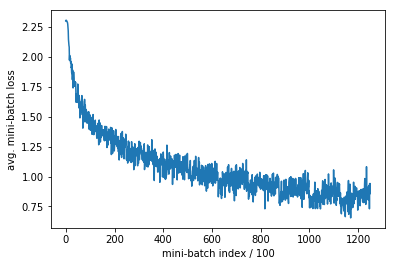

In [8]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate on Test Dataset

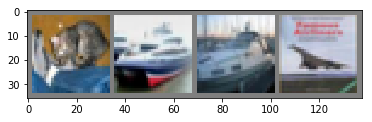

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship truck plane


In [9]:
# Check several images.
dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [10]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 63 %


In [11]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 72 %
Accuracy of   car : 78 %
Accuracy of  bird : 42 %
Accuracy of   cat : 33 %
Accuracy of  deer : 61 %
Accuracy of   dog : 58 %
Accuracy of  frog : 64 %
Accuracy of horse : 76 %
Accuracy of  ship : 74 %
Accuracy of truck : 70 %
